# Final mobilenetV2

In [ ]:
!pip install tensorflow_probability

In [ ]:
!pip install tensorflow-addons
!pip install tensorflow-addons[tensorflow]
import tensorflow as tf
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 4.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile
import cv2
import tensorflow_addons as tfa
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_DIR = "/content/gdrive/MyDrive/segmented_split/watershed_1"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])

 watershed_normal  7451
 watershed_infected  5540


We will split the data such that
70% for training
15 % for vailadation
15 % for testing



In [ ]:
def datafolder(path,split):
  if not os.path.exists('/content/gdrive/MyDrive/segmented_split/watershed_1'+path):
    os.mkdir("/content/gdrive/MyDrive/segmented_split/watershed_1"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("/content/gdrive/MyDrive/segmented_split/watershed_1"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split * number_of_images[dir])-5),replace=False):

          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("/content/gdrive/MyDrive/segmented_split/watershed_1"+path,dir)
          shutil.copy(O,D)
        #  os.remove(O)

  else:
     print("Folder already exist")


In [ ]:
datafolder('train',0.7)

In [ ]:
datafolder("val",0.15)

In [ ]:
datafolder("test",0.15)

In [ ]:

train_infected_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1train/Infected'


train_proper_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1train/Proper'


valid_infected_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1val/Infected'


valid_proper_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1val/Proper'

In [ ]:
train_infected_names = os.listdir(train_infected_dir)
print(train_infected_names[:10])

train_proper_names = os.listdir(train_proper_dir)
print(train_proper_names[:10])

validation_infected_names = os.listdir(valid_infected_dir)
print(validation_infected_names[:10])

validation_proper_names = os.listdir(valid_proper_dir)
print(validation_proper_names[:10])

['image_9620_segmented.jpg', 'image_11347_segmented.jpg', 'image_12884_segmented.jpg', 'image_12149_segmented.jpg', 'image_11817_segmented.jpg', 'image_11601_segmented.jpg', 'image_11217_segmented.jpg', 'image_11878_segmented.jpg', 'image_11517_segmented.jpg', 'image_10766_segmented.jpg']
['image_5234_segmented.jpg', 'image_1126_segmented.jpg', 'image_227_segmented.jpg', 'image_1264_segmented.jpg', 'image_2072_segmented.jpg', 'image_2112_segmented.jpg', 'image_6450_segmented.jpg', 'image_2418_segmented.jpg', 'image_333_segmented.jpg', 'image_3597_segmented.jpg']
['image_9019_segmented.jpg', 'image_8689_segmented.jpg', 'image_8028_segmented.jpg', 'image_8017_segmented.jpg', 'image_10041_segmented.jpg', 'image_8527_segmented.jpg', 'image_10153_segmented.jpg', 'image_7607_segmented.jpg', 'image_10583_segmented.jpg', 'image_7727_segmented.jpg']
['image_2155_segmented.jpg', 'image_3102_segmented.jpg', 'image_758_segmented.jpg', 'image_6260_segmented.jpg', 'image_1691_segmented.jpg', 'image_

In [ ]:
print('total training infected images:', len(os.listdir(train_infected_dir)))
print('total training proper images:', len(os.listdir(train_proper_dir)))
print('total validation infected images:', len(os.listdir(valid_infected_dir)))
print('total validation proper images:', len(os.listdir(valid_proper_dir)))

total training infected images: 3872
total training proper images: 5210
total validation infected images: 826
total validation proper images: 1112


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

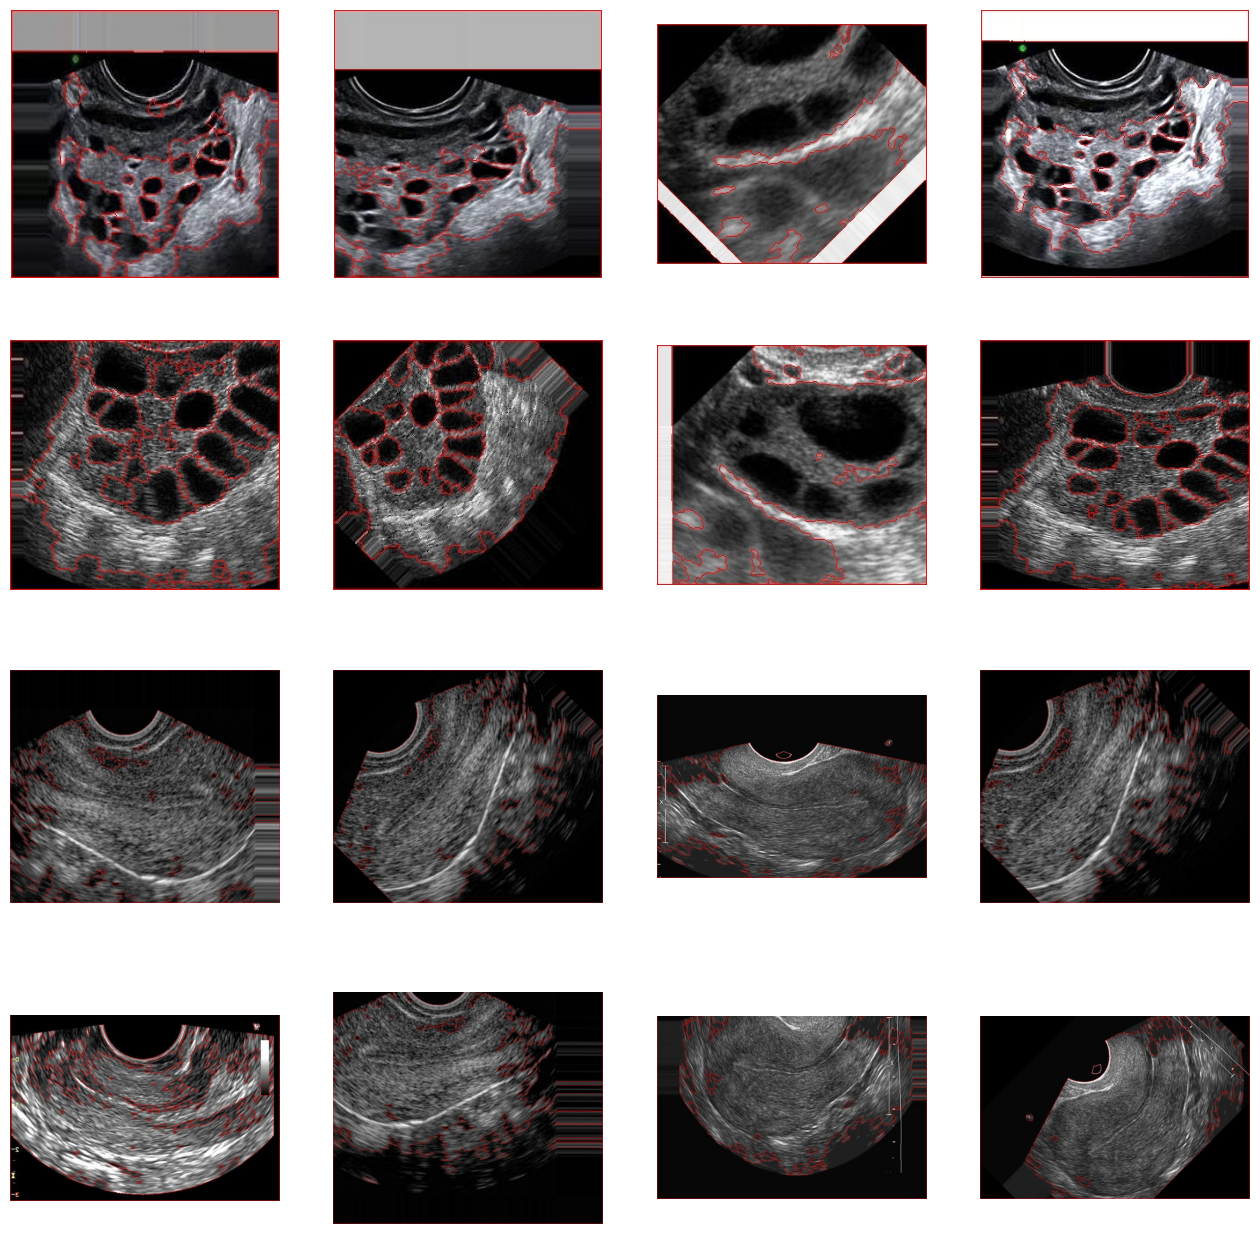

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Infected_pic = [os.path.join(train_infected_dir, fname)
                for fname in train_infected_names[pic_index-8:pic_index]]
next_Proper_pic = [os.path.join(train_proper_dir, fname)
                for fname in train_proper_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_Infected_pic + next_Proper_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.metrics import Precision, Recall, AUC, FalsePositives, TruePositives, FalseNegatives
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.mobilenet import preprocess_input

# Set the paths to your dataset folders
train_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1train'
val_dir = '/content/gdrive/MyDrive/segmented_split/watershed_1val'

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Set the batch size and number of epochs
batch_size = 32
num_epochs = 10

# Loading and preprocessing the dataset
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=50,
                             zoom_range=[5,0.5])
train_generator = train_datagen.flow_from_directory(directory=train_dir, classes=['Infected','Proper'],target_size=input_shape[:2],
                                                    batch_size=batch_size, class_mode='binary')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(directory=val_dir, classes=['Infected','Proper'],target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')

# Creating the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


# Adding custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer with dropout rate of 0.5
predictions = Dense(1, activation='sigmoid')(x)

# Createing the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics = ['accuracy', Precision(), Recall(),tfa.metrics.F1Score(num_classes=2,
                      average='micro',
                      threshold=0.5)])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model



Found 9082 images belonging to 2 classes.
Found 1938 images belonging to 2 classes.


In [ ]:
hist=model.fit(
    train_generator_2,
    steps_per_epoch=train_generator_2.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator_2,
    validation_steps=val_generator_2.n // batch_size,


)

Epoch 1/10
204/204 [==============================] - 1162s 6s/step - loss: 0.8500 - accuracy: 0.9000 - precision: 0.8758 - recall: 0.8758 - f1_score: 0.8758 - val_loss: 0.0380 - val_accuracy: 0.9920 - val_precision: 0.9872 - val_recall: 0.9926 - val_f1_score: 0.9899
Epoch 2/10
204/204 [==============================] - 286s 1s/step - loss: 0.1073 - accuracy: 0.9598 - precision: 0.9526 - recall: 0.9475 - f1_score: 0.9500 - val_loss: 0.1073 - val_accuracy: 0.9484 - val_precision: 0.8867 - val_recall: 0.9963 - val_f1_score: 0.9383
Epoch 3/10
204/204 [==============================] - 282s 1s/step - loss: 0.0969 - accuracy: 0.9638 - precision: 0.9531 - recall: 0.9575 - f1_score: 0.9553 - val_loss: 0.0626 - val_accuracy: 0.9724 - val_precision: 0.9360 - val_recall: 0.9982 - val_f1_score: 0.9661
Epoch 4/10
204/204 [==============================] - 284s 1s/step - loss: 0.1196 - accuracy: 0.9534 - precision: 0.9404 - recall: 0.9440 - f1_score: 0.9422 - val_loss: 0.0559 - val_accuracy: 0.9804

In [ ]:
loaded_model = tf.keras.models.load_model('best_model.h5')

61/61 [==============================] - 54s 877ms/step


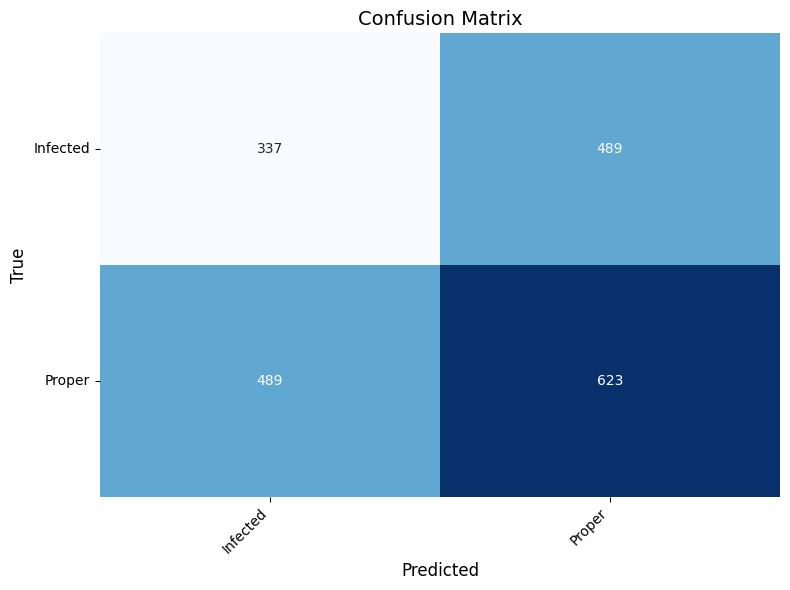

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
y_pred = loaded_model.predict(val_generator)
y_pred = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary predictions

# Get the true labels
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = val_generator.class_indices

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(list(class_labels.keys()), rotation=45, ha='right', fontsize=10)
ax.yaxis.set_ticklabels(list(class_labels.keys()), rotation=0, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
test_data='/content/gdrive/MyDrive/segmented_split/watershed_1test'
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator= test_datagen.flow_from_directory(directory=test_data, target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')

Found 1938 images belonging to 2 classes.


In [ ]:
loaded_model.evaluate(test_generator)

61/61 [==============================] - 61s 974ms/step - loss: 0.0011 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000 - f1_score: 1.0000


[0.0010833845008164644, 1.0, 1.0, 1.0, 1.0]

In [ ]:
train_generator.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
val_generator.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
test_generator.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =loaded_model.predict(input_arr)
      if pred == 1:
          print("Proper")
      else :
         print("Infected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 1s 606ms/step
Proper


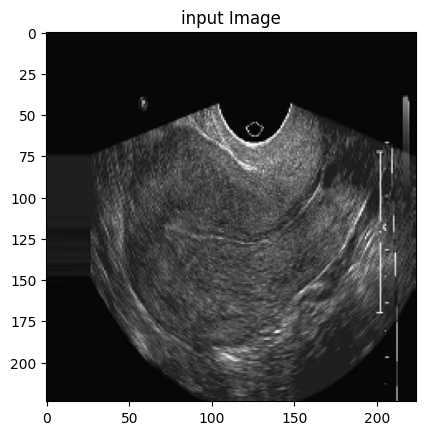

In [ ]:
#It is the proper image sample
predictimage("/content/gdrive/MyDrive/pcos/pcos2test/Proper/img1_14.jpg")

1/1 [==============================] - 0s 110ms/step
Proper


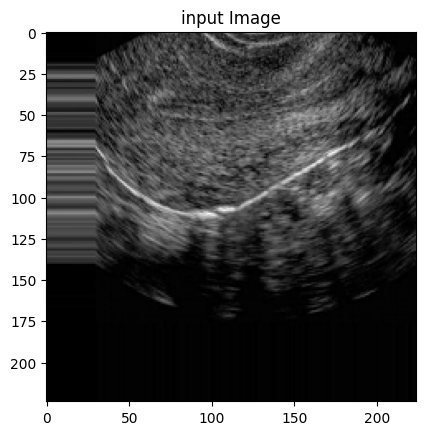

In [ ]:
#It is the proper image sample
predictimage("/content/gdrive/MyDrive/pcos/pcos2test/Proper/img1_134.jpg")

1/1 [==============================] - 0s 36ms/step
Infected


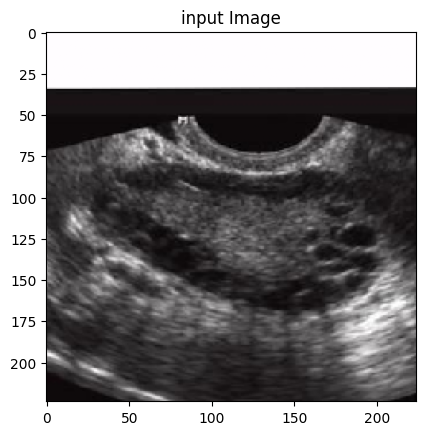

In [ ]:
#It is the infected image sample
predictimage("/content/gdrive/MyDrive/PCOS/PCOS/train/img_0_367.jpg")

1/1 [==============================] - 0s 42ms/step
Infected


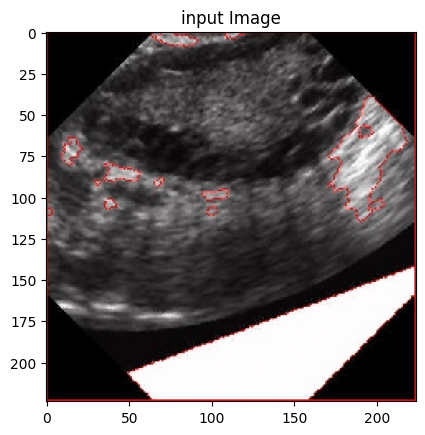

In [ ]:
predictimage("/content/gdrive/MyDrive/segmented_split/watershed_1test/Infected/image_7519_segmented.jpg")

1/1 [==============================] - 0s 36ms/step
Infected


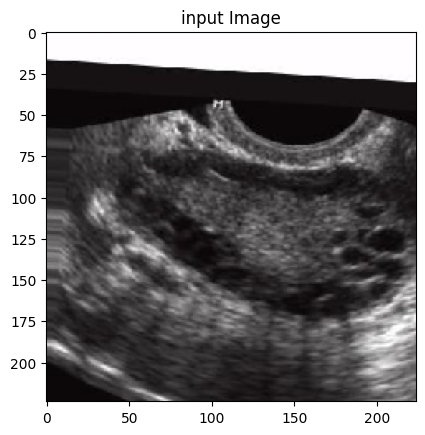

In [ ]:
#It is the infected image sample
predictimage("/content/gdrive/MyDrive/PCOS/PCOS/train/img_0_155.jpg")

1/1 [==============================] - 0s 79ms/step
Infected


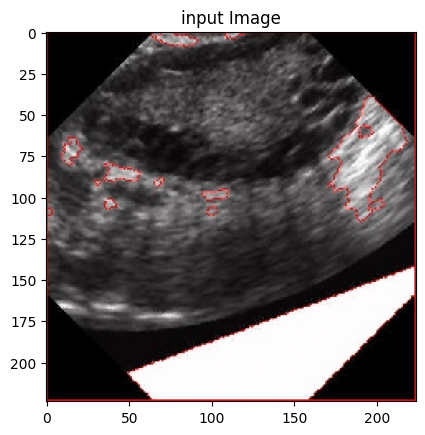

In [ ]:
#It is the infected image sample
predictimage('/content/gdrive/MyDrive/segmented_split/watershed_1test/Infected/image_7519_segmented.jpg')

1/1 [==============================] - 0s 36ms/step
Proper


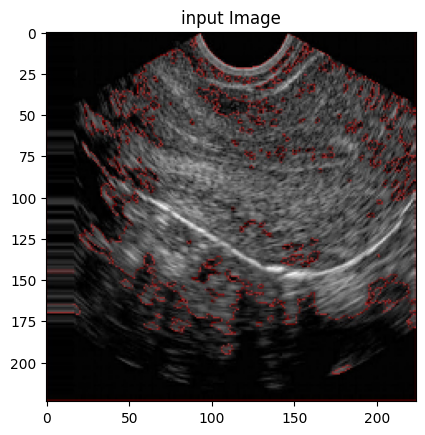

In [ ]:
#It is the Proper image sample
predictimage('/content/gdrive/MyDrive/segmented_split/watershed_1test/Proper/image_141_segmented.jpg')

# importing necessary libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.metrics import Precision, Recall, AUC, FalsePositives, TruePositives, FalseNegatives
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications.mobilenet import preprocess_input

In [ ]:
# Directory with our training dandelion pictures
train_infected_dir = '/content/gdrive/MyDrive/pcos/pcos2train/Infected'

# Directory with our training grass pictures
train_proper_dir = '/content/gdrive/MyDrive/pcos/pcos2train/Proper'

# Directory with our validation dandelion pictures
valid_infected_dir = '/content/gdrive/MyDrive/pcos/pcos2val/Infected'

# Directory with our validation grass pictures
valid_proper_dir = '/content/gdrive/MyDrive/pcos/pcos2val/Proper'

In [ ]:
train_infected_names = os.listdir(train_infected_dir)
print(train_infected_names[:10])

train_proper_names = os.listdir(train_proper_dir)
print(train_proper_names[:10])

validation_infected_names = os.listdir(valid_infected_dir)
print(validation_infected_names[:10])

validation_proper_names = os.listdir(valid_proper_dir)
print(validation_proper_names[:10])

['img_384.jpg', 'img_3456.jpg', 'img_3957.jpg', 'img_221.jpg', 'img_3909.jpg', 'img_3665.jpg', 'img_1055.jpg', 'img_4269.jpg', 'img_3752.jpg', 'img_73.jpg']
['img1_1299.jpg', 'img1_2524.jpg', 'img1_537.jpg', 'img1_149.jpg', 'img1_1137.jpg', 'img1_2038.jpg', 'img1_1159.jpg', 'img1_2595.jpg', 'img1_1397.jpg', 'img1_2128.jpg']
['img_4647.jpg', 'img_2167.jpg', 'img_2902.jpg', 'img_4332.jpg', 'img_3261.jpg', 'img_3133.jpg', 'img_4264.jpg', 'img_2151.jpg', 'img_3177.jpg', 'img_4072.jpg']
['img1_2366.jpg', 'img1_1356.jpg', 'img1_2439.jpg', 'img1_1369.jpg', 'img1_409.jpg', 'img1_1552.jpg', 'img1_670.jpg', 'img1_894.jpg', 'img1_2243.jpg', 'img1_1961.jpg']


In [ ]:
print('total training infected images:', len(os.listdir(train_infected_dir)))
print('total training proper images:', len(os.listdir(train_proper_dir)))
print('total validation infected images:', len(os.listdir(valid_infected_dir)))
print('total validation proper images:', len(os.listdir(valid_proper_dir)))

total training infected images: 3908
total training proper images: 2644
total validation infected images: 834
total validation proper images: 561


 Let's take a look at a few pictures to get a better sense of what they look like.configuring the matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Displaying a batch of 8 infected and 8 proper pictures.

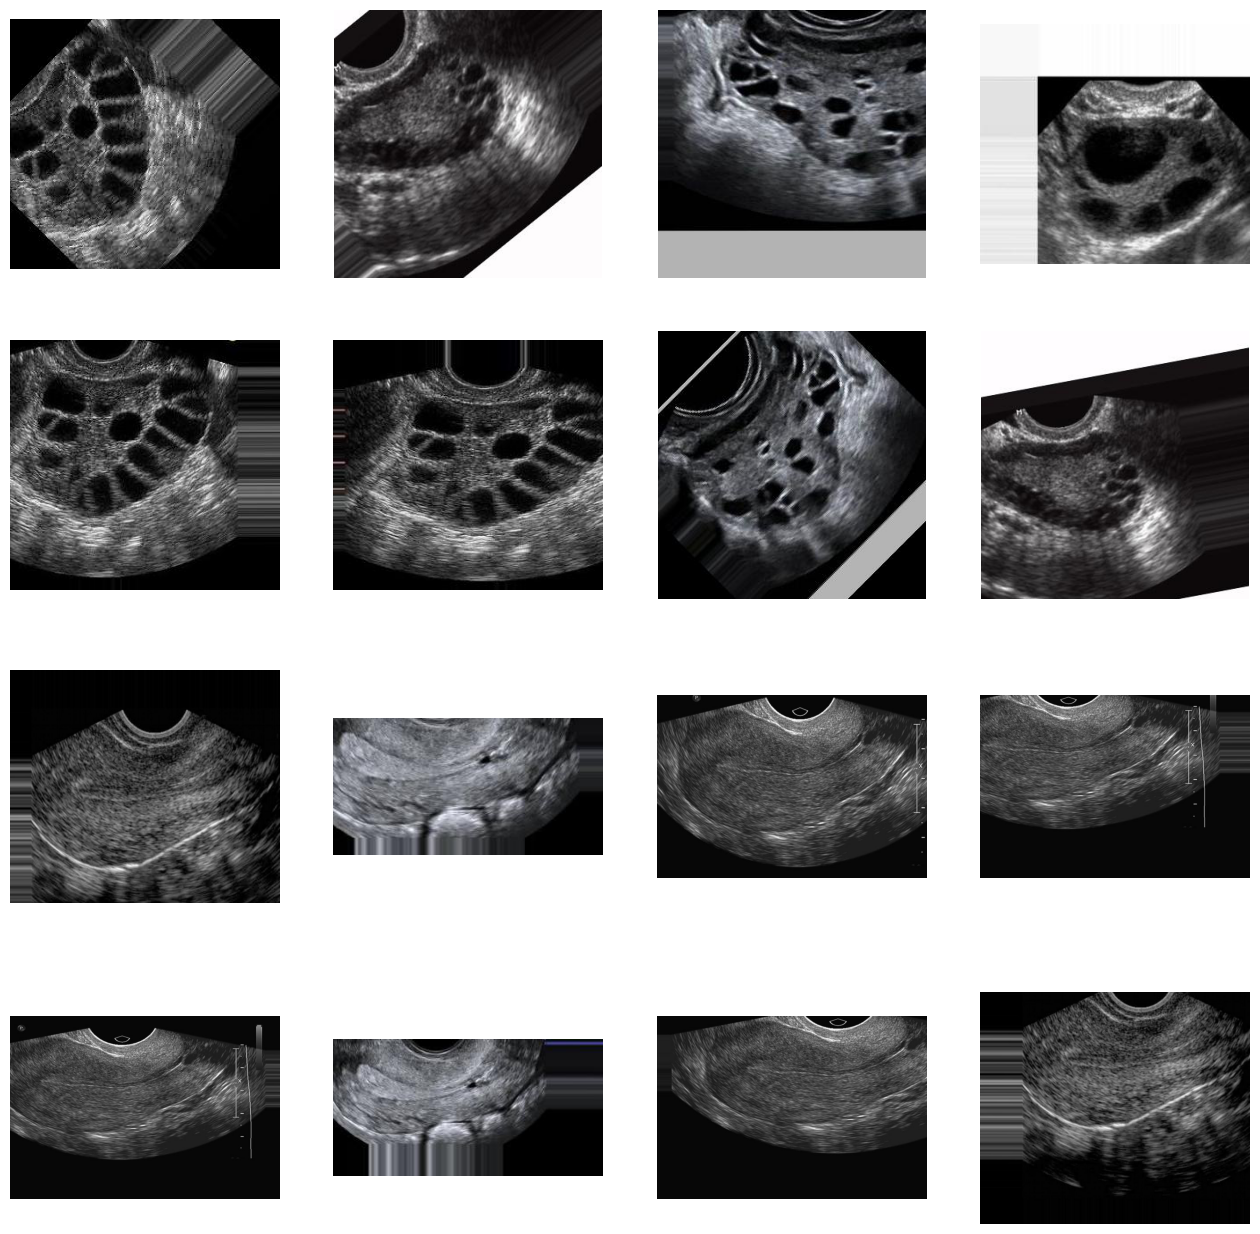

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_infected_dir, fname)
                for fname in train_infected_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_proper_dir, fname)
                for fname in train_proper_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:

# Set the paths to your dataset folders
train_dir_2 = '/content/gdrive/MyDrive/pcos/pcos2train'
val_dir_2 = '/content/gdrive/MyDrive/pcos/pcos2val'

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Set the batch size and number of epochs
batch_size = 32
num_epochs = 10

# Load and preprocess the dataset
train_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input,width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=50,
                             zoom_range=[5,0.5])
train_generator_2 = train_datagen_2.flow_from_directory(directory=train_dir_2, classes=['Infected','Proper'],target_size=input_shape[:2],
                                                    batch_size=batch_size, class_mode='binary')

val_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator_2= val_datagen_2.flow_from_directory(directory=val_dir_2,classes=['Infected','Proper'], target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary',shuffle=False)

# Create the MobileNetV2 base model
base_model_2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


# Add custom classification layers on top
x = base_model_2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer with dropout rate of 0.5
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model_2 = Model(inputs=base_model_2.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model_2.layers:
    layer.trainable = False

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics = ['accuracy', Precision(), Recall(),tfa.metrics.F1Score(num_classes=2,
                      average='micro',
                      threshold=0.5)])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




Found 6552 images belonging to 2 classes.
Found 1395 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
hist=model.fit(
    train_generator_2,
    steps_per_epoch=train_generator_2.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator_2,
    validation_steps=val_generator_2.n // batch_size,


)

Epoch 1/10
204/204 [==============================] - 1162s 6s/step - loss: 0.8500 - accuracy: 0.9000 - precision: 0.8758 - recall: 0.8758 - f1_score: 0.8758 - val_loss: 0.0380 - val_accuracy: 0.9920 - val_precision: 0.9872 - val_recall: 0.9926 - val_f1_score: 0.9899
Epoch 2/10
204/204 [==============================] - 286s 1s/step - loss: 0.1073 - accuracy: 0.9598 - precision: 0.9526 - recall: 0.9475 - f1_score: 0.9500 - val_loss: 0.1073 - val_accuracy: 0.9484 - val_precision: 0.8867 - val_recall: 0.9963 - val_f1_score: 0.9383
Epoch 3/10
204/204 [==============================] - 282s 1s/step - loss: 0.0969 - accuracy: 0.9638 - precision: 0.9531 - recall: 0.9575 - f1_score: 0.9553 - val_loss: 0.0626 - val_accuracy: 0.9724 - val_precision: 0.9360 - val_recall: 0.9982 - val_f1_score: 0.9661
Epoch 4/10
204/204 [==============================] - 284s 1s/step - loss: 0.1196 - accuracy: 0.9534 - precision: 0.9404 - recall: 0.9440 - f1_score: 0.9422 - val_loss: 0.0559 - val_accuracy: 0.9804

44/44 [==============================] - 35s 784ms/step


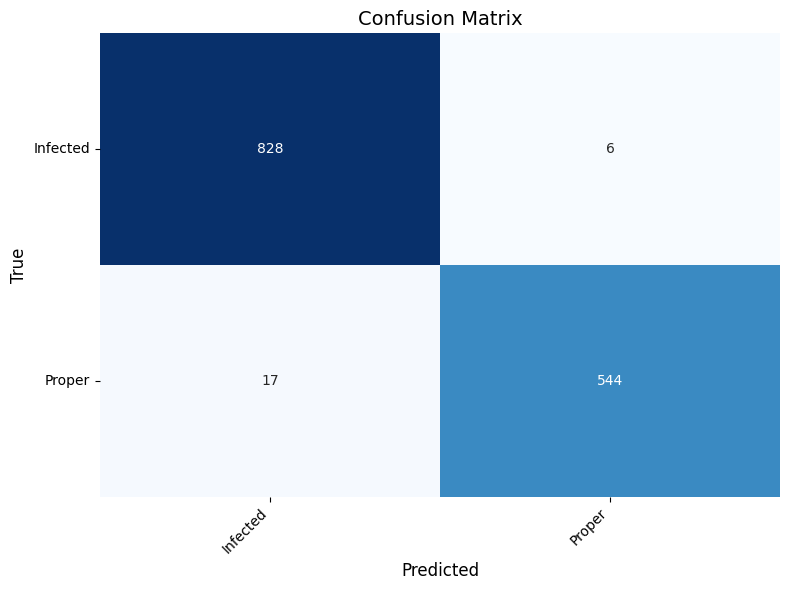

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
y_pred = model_2.predict(val_generator_2)
y_pred = np.round(y_pred).astype(int).flatten()  # Convert probabilities to binary predictions

# Get the true labels
y_true = val_generator_2.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = val_generator_2.class_indices

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(list(class_labels.keys()), rotation=45, ha='right', fontsize=10)
ax.yaxis.set_ticklabels(list(class_labels.keys()), rotation=0, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
test_data='/content/gdrive/MyDrive/pcos/pcos2test'
test_datagen_2 = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator_2= test_datagen_2.flow_from_directory(directory=test_data, target_size=input_shape[:2],
                                                batch_size=batch_size, class_mode='binary')

Found 1396 images belonging to 2 classes.


In [ ]:
model_2.evaluate(test_generator_2)

44/44 [==============================] - 187s 4s/step - loss: 0.0505 - accuracy: 0.9799 - precision: 0.9908 - recall: 0.9591 - f1_score: 0.9747


[0.050467658787965775,
 0.9799426794052124,
 0.9908257126808167,
 0.9591474533081055,
 0.9747292995452881]

In [ ]:
train_generator_2.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
test_generator_2.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
val_generator_2.class_indices

{'Infected': 0, 'Proper': 1}

In [ ]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model_2.predict(input_arr)
      if pred == 1:
          print("Proper")
      else :
         print("Infected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 0s 62ms/step
Proper


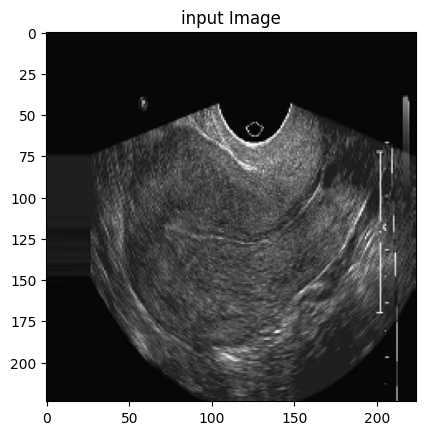

In [ ]:
#It is the proper image sample
predictimage("/content/gdrive/MyDrive/pcos/pcos2test/Proper/img1_14.jpg")

1/1 [==============================] - 0s 40ms/step
Infected


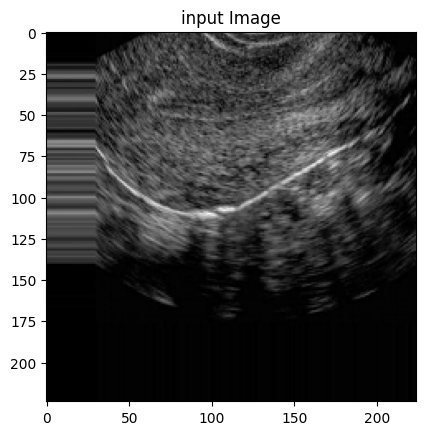

In [ ]:
#It is the proper image sample
predictimage("/content/gdrive/MyDrive/pcos/pcos2test/Proper/img1_134.jpg")

1/1 [==============================] - 0s 39ms/step
Infected


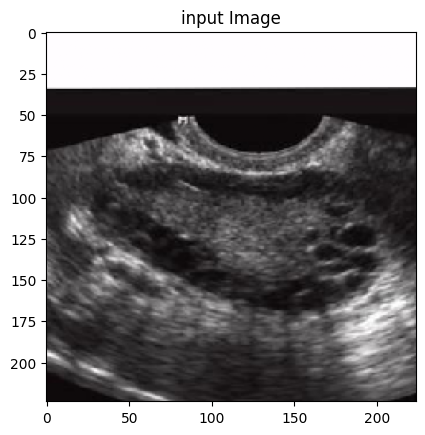

In [ ]:
#It is the infected image sample
predictimage("/content/gdrive/MyDrive/PCOS/PCOS/train/img_0_367.jpg")

In [ ]:
hist=model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[early_stopping,checkpoint]

)

Epoch 1/10
283/283 [==============================] - 380s 1s/step - loss: 0.4438 - accuracy: 0.9625 - precision_2: 0.9667 - recall_2: 0.9680 - f1_score: 0.9674 - val_loss: 0.0113 - val_accuracy: 0.9964 - val_precision_2: 0.9937 - val_recall_2: 1.0000 - val_f1_score: 0.9968
Epoch 2/10
283/283 [==============================] - 373s 1s/step - loss: 0.0361 - accuracy: 0.9875 - precision_2: 0.9892 - recall_2: 0.9890 - f1_score: 0.9891 - val_loss: 0.0321 - val_accuracy: 0.9870 - val_precision_2: 0.9778 - val_recall_2: 1.0000 - val_f1_score: 0.9888
Epoch 3/10
283/283 [==============================] - 405s 1s/step - loss: 0.0333 - accuracy: 0.9895 - precision_2: 0.9904 - recall_2: 0.9913 - f1_score: 0.9909 - val_loss: 0.0104 - val_accuracy: 0.9969 - val_precision_2: 0.9946 - val_recall_2: 1.0000 - val_f1_score: 0.9973
Epoch 4/10
283/283 [==============================] - 381s 1s/step - loss: 0.0903 - accuracy: 0.9799 - precision_2: 0.9825 - recall_2: 0.9825 - f1_score: 0.9825 - val_loss: 0.